# OASIS INFOBYTE DATA SCIENCE INTERN  

# TASK 2 UNEMPLOYMENT ANALYSIS WITH PYTHON

# AUTHOR :- Hrushikesh Sutar

# Git HuB: https://github.com/hrushi825/OASIS-INFO-TECH

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import calendar
import datetime as dt

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

In [3]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Oasis infotech/UNEMPLOYMENT/Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.shape

(768, 7)

# Describing the dataset 2 ways

In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
description = df.describe()
print(description)

        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                    

# Checking null values 4 ways

In [ ]:
df.isnull().head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [ ]:
df.isnull().tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True
767,True,True,True,True,True,True,True


In [ ]:
nulls = df.isnull().sum()
print(nulls)

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [ ]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
df.columns=['Region','Date','Frequency','Estimated Unemployment Rate','Estimated Employed',
            'Estimated Labour Participation Rate','Area']

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [ ]:
df['Frequency'] = df['Frequency'].astype('category')
df['Month'] = df['Date'].dt.month

In [ ]:
df['Region'] = df['Region'].astype('category')
df.drop(columns='Month',inplace=True)
df.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural


In [ ]:
df_stats = df[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate']]


round(df_stats.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated Labour Participation Rate,740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57


# to estimate unemployment and employed by region using groupby function

In [ ]:
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed',
                                       'Estimated Labour Participation Rate']].mean().reset_index()

region_stats = round(region_stats,2)
region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,Andhra Pradesh,7.48,8154093.18,39.38
1,Assam,6.43,5354772.15,44.87
2,Bihar,18.92,12366189.14,38.15
3,Chandigarh,15.99,316831.25,39.34
4,Chhattisgarh,9.24,4303498.57,42.81
5,Delhi,16.50,2627512.86,38.93
6,Goa,9.27,226308.33,39.25
7,Gujarat,6.66,11402012.79,46.10
8,Haryana,26.28,3557072.46,42.74
9,Himachal Pradesh,18.54,1059823.71,44.22


# 2 Types of heatmap, boxplot, scatterplot, barplot, sunburst, histplot

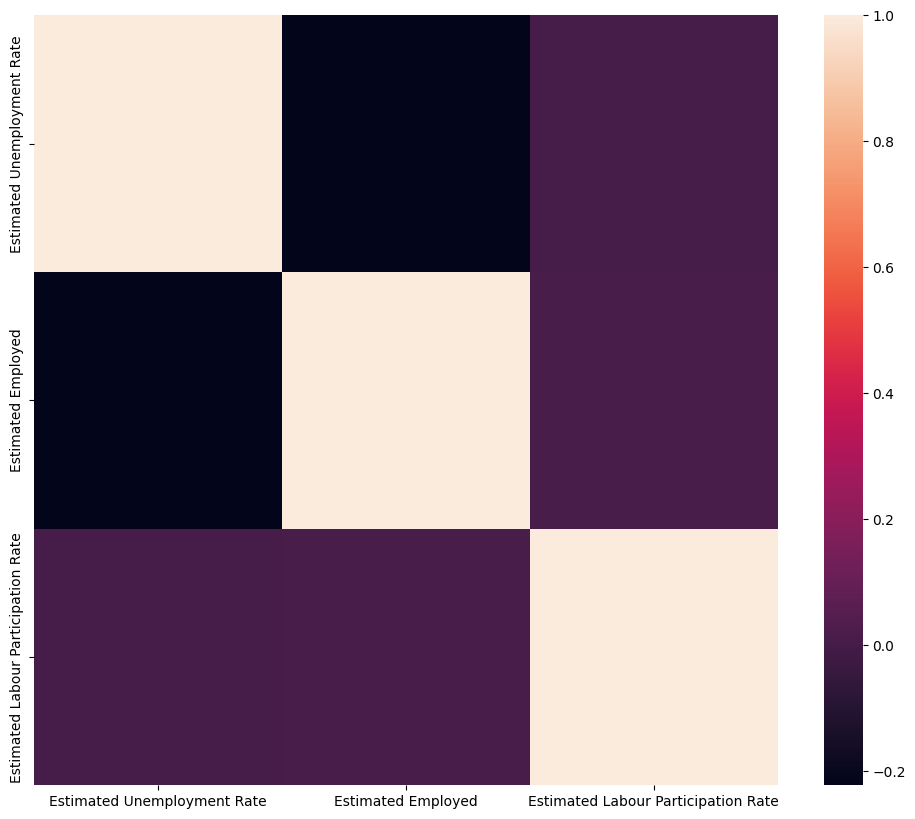

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())
plt.show()

In [ ]:
fig = px.scatter_matrix(df,template='plotly',
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Region')
fig.show()

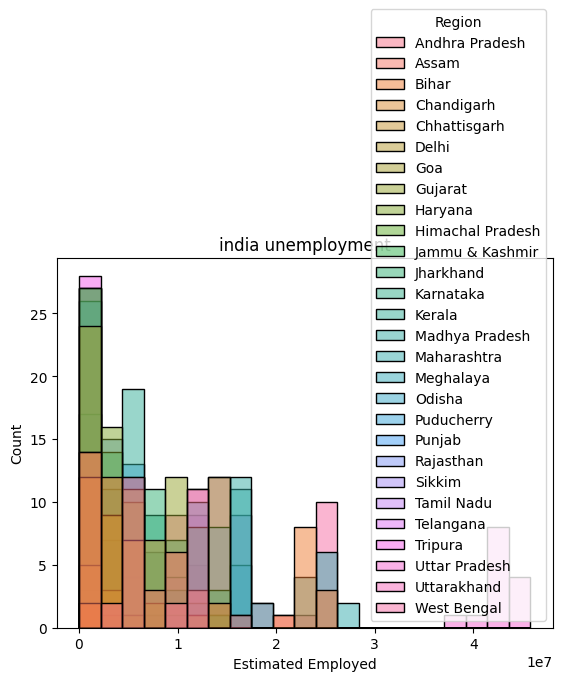

In [ ]:
plt.title("india unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=df)
plt.show()

In [ ]:
df.Region.nunique()

28

In [ ]:
total = df.pivot_table("Estimated Unemployment Rate",index=['Region'],aggfunc='mean')
state=total.sort_values(by='Estimated Unemployment Rate',ascending=False)[:47]
print(state)

                  Estimated Unemployment Rate
Region                                       
Tripura                             28.350357
Haryana                             26.283214
Jharkhand                           20.585000
Bihar                               18.918214
Himachal Pradesh                    18.540357
Delhi                               16.495357
Jammu & Kashmir                     16.188571
Chandigarh                          15.991667
Rajasthan                           14.058214
Uttar Pradesh                       12.551429
Punjab                              12.031071
Puducherry                          10.215000
Kerala                              10.123929
Tamil Nadu                           9.284286
Goa                                  9.274167
Chhattisgarh                         9.240357
West Bengal                          8.124643
Telangana                            7.737857
Maharashtra                          7.557500
Andhra Pradesh                    

# Thank You...